In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
import gempy as gp
from gempy.assets.geophysics import GravityPreprocessing

# Aux imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


No module named 'osgeo'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\tgluz\.conda\envs\model_gem\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Script to quantify the difference in forward gravity response of a GemPy model, depending on the fault angle 

In [3]:
data_path = 'C:/RWTH_Aachen/thesis/GemPy_Model_from_Andrea/mod3/fault_angle_test/angles/quantification_grav_values/'

In [4]:
#Read gravity values from the models with different angles 
grav55 = pd.read_csv(data_path + '55.csv')
arr55=np.array(grav55['gravity55'])
grav65 = pd.read_csv(data_path + '65.csv')
arr65=np.array(grav55['gravity55'])
grav75 = pd.read_csv(data_path + '75.csv')
arr75=np.array(grav55['gravity55'])
grav85 = pd.read_csv(data_path + '85.csv')
arr85=np.array(grav55['gravity55'])

#and one without divergence, just to see how different it is 
gravND = pd.read_csv(data_path + '65_no2nd.csv')
arrND=np.array(gravND['no2'])
reND=arrND.reshape(20, 20)

re55=arr55.reshape(20, 20)
re65=arr65.reshape(20, 20)
re75=arr75.reshape(20, 20)
re85=arr85.reshape(20, 20)

In [5]:
#test plot 
#grav_res = 20
#X = np.linspace(202000, 218000, grav_res)
#Y = np.linspace(378000, 392000, grav_res)
#plt.pcolormesh(X, Y, re55, cmap="viridis", 
#               vmin=grav55['gravity55'].min()-10, vmax=grav55['gravity55'].max())
#plt.colorbar(label="mGal")
#plt.xlabel("RD Amerfoot Easting [m]")
#plt.ylabel("RD Amerfoot  Northing [m]")
#plt.title("Forward response of 55 deg fault")
#plt.show

In [6]:
#comparing different angles
diff65_55=grav65['gravity65']-grav55['gravity55']
diff75_65=grav75['gravity75']-grav65['gravity65']
diff85_75=grav85['gravity85']-grav75['gravity75']
diff85_55=grav85['gravity85']-grav55['gravity55']
diffdiv=grav65['gravity65']-gravND['no2']


In [7]:
#reshaping for the plotting
arr_diff65_55=np.array(diff65_55)
re_arr_diff65_55=arr_diff65_55.reshape(20, 20)

arr_diff75_65=np.array(diff75_65)
re_arr_diff75_65=arr_diff75_65.reshape(20, 20)

arr_diff85_75=np.array(diff85_75)
re_arr_diff85_75=arr_diff85_75.reshape(20, 20)

arr_diff85_55=np.array(diff85_55)
re_arr_diff85_55=arr_diff85_55.reshape(20, 20)

arr_diffdiv=np.array(diffdiv)
re_arr_diffdiv=arr_diffdiv.reshape(20, 20)

In [8]:
#Import the coordninate system to plot the result
grav_res = 20
X = np.linspace(202000, 218000, grav_res)
Y = np.linspace(378000, 392000, grav_res)

<function matplotlib.pyplot.show(close=None, block=None)>

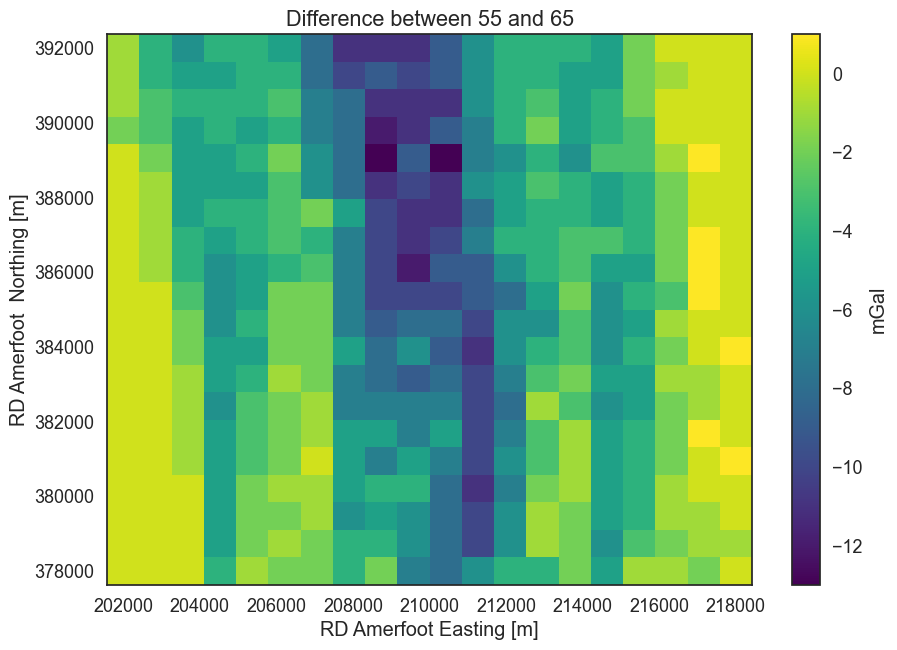

In [9]:
#55 vs 65 
plt.pcolormesh(X, Y, re_arr_diff65_55, cmap="viridis", 
               vmin=diff65_55.min(), vmax=diff65_55.max())
plt.colorbar(label="mGal")
plt.xlabel("RD Amerfoot Easting [m]")
plt.ylabel("RD Amerfoot  Northing [m]")
plt.title("Difference between 55 and 65")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

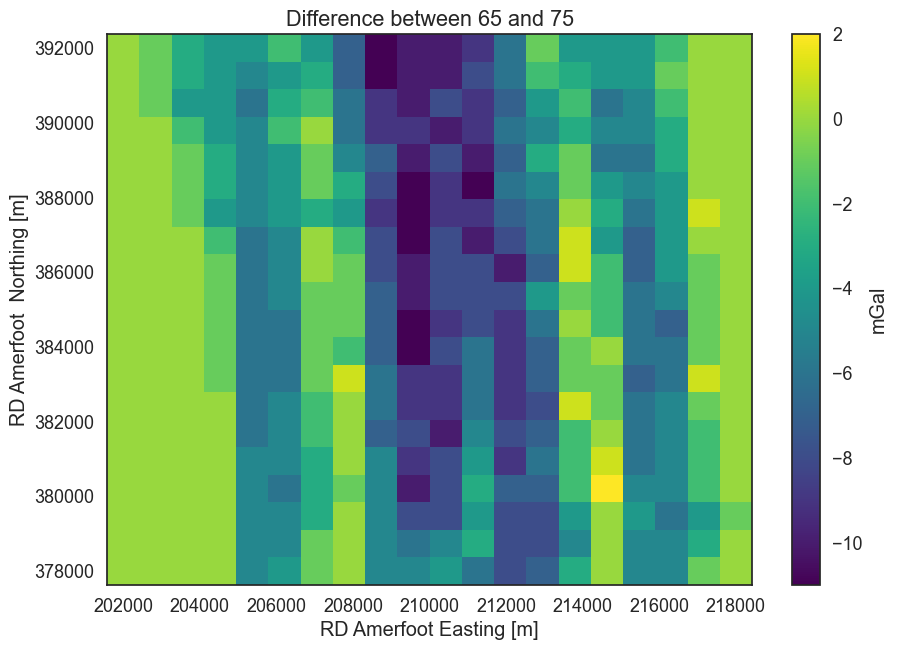

In [10]:
#75 vs 65 
plt.pcolormesh(X, Y, re_arr_diff75_65, cmap="viridis", 
               vmin=diff75_65.min(), vmax=diff75_65.max())
plt.colorbar(label="mGal")
plt.xlabel("RD Amerfoot Easting [m]")
plt.ylabel("RD Amerfoot  Northing [m]")
plt.title("Difference between 65 and 75")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

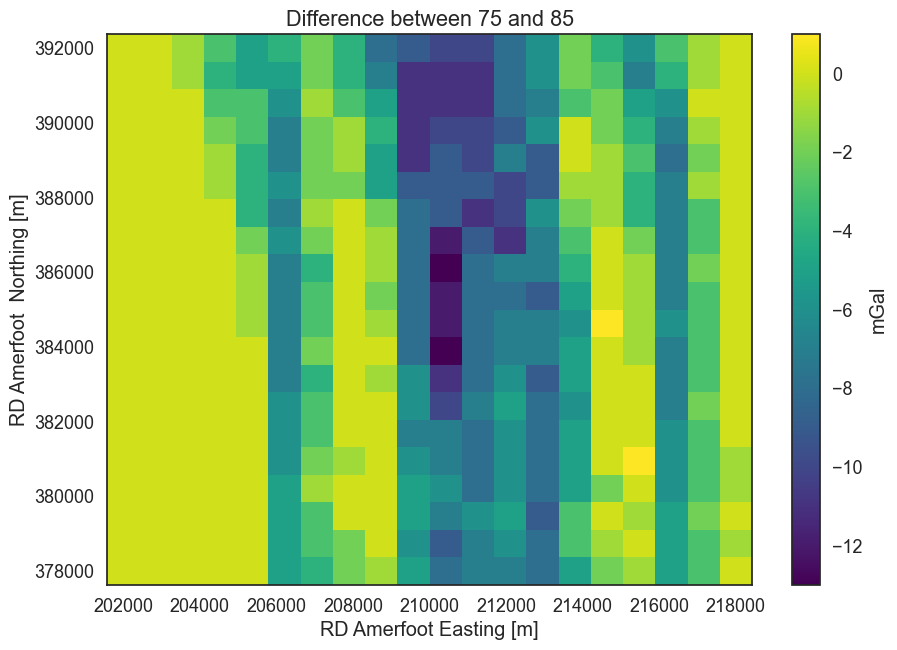

In [11]:
#85 vs 75 
plt.pcolormesh(X, Y, re_arr_diff85_75, cmap="viridis", 
               vmin=diff85_75.min(), vmax=diff85_75.max())
plt.colorbar(label="mGal")
plt.xlabel("RD Amerfoot Easting [m]")
plt.ylabel("RD Amerfoot  Northing [m]")
plt.title("Difference between 75 and 85")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

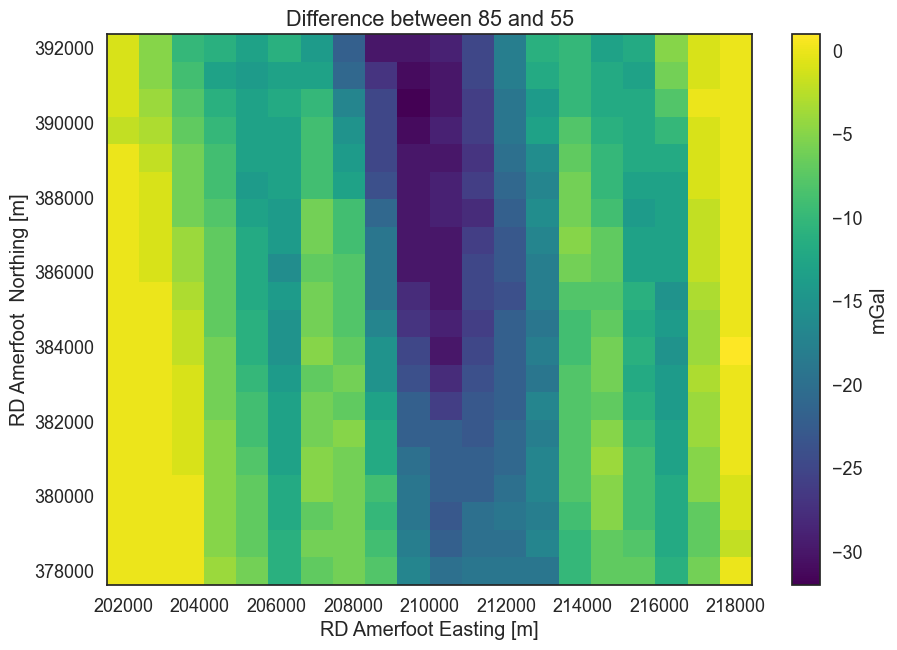

In [12]:
#85 vs 55 
plt.pcolormesh(X, Y, re_arr_diff85_55, cmap="viridis", 
               vmin=diff85_55.min(), vmax=diff85_55.max())
plt.colorbar(label="mGal")
plt.xlabel("RD Amerfoot Easting [m]")
plt.ylabel("RD Amerfoot  Northing [m]")
plt.title("Difference between 85 and 55")
plt.show

Text(0.5, 1.0, 'Difference between 85 and 55')

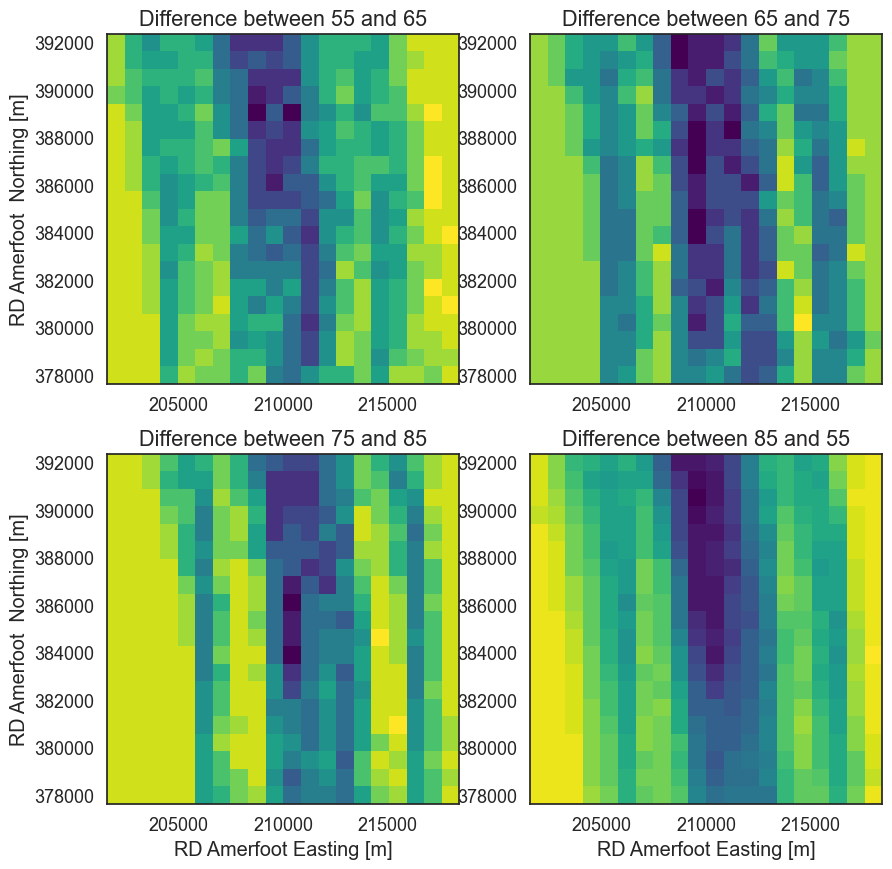

In [13]:
# Plotting all four graphs in a single figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

#top left
axs[0, 0].pcolormesh(X, Y, re_arr_diff65_55, cmap="viridis", 
               vmin=diff65_55.min(), vmax=diff65_55.max())
axs[0, 0].set_ylabel("RD Amerfoot  Northing [m]")
axs[0, 0].set_title("Difference between 55 and 65")


#top right
axs[0, 1].pcolormesh(X, Y, re_arr_diff75_65, cmap="viridis", 
               vmin=diff75_65.min(), vmax=diff75_65.max())
axs[0, 1].set_title("Difference between 65 and 75")



#bottom left
axs[1, 0].pcolormesh(X, Y, re_arr_diff85_75, cmap="viridis", 
               vmin=diff85_75.min(), vmax=diff85_75.max())
axs[1, 0].set_xlabel("RD Amerfoot Easting [m]")
axs[1, 0].set_ylabel("RD Amerfoot  Northing [m]")
axs[1, 0].set_title("Difference between 75 and 85")


#bottom right
axs[1, 1].pcolormesh(X, Y, re_arr_diff85_55, cmap="viridis", 
               vmin=diff85_55.min(), vmax=diff85_55.max())
axs[1, 1].set_xlabel("RD Amerfoot Easting [m]")

axs[1, 1].set_title("Difference between 85 and 55")



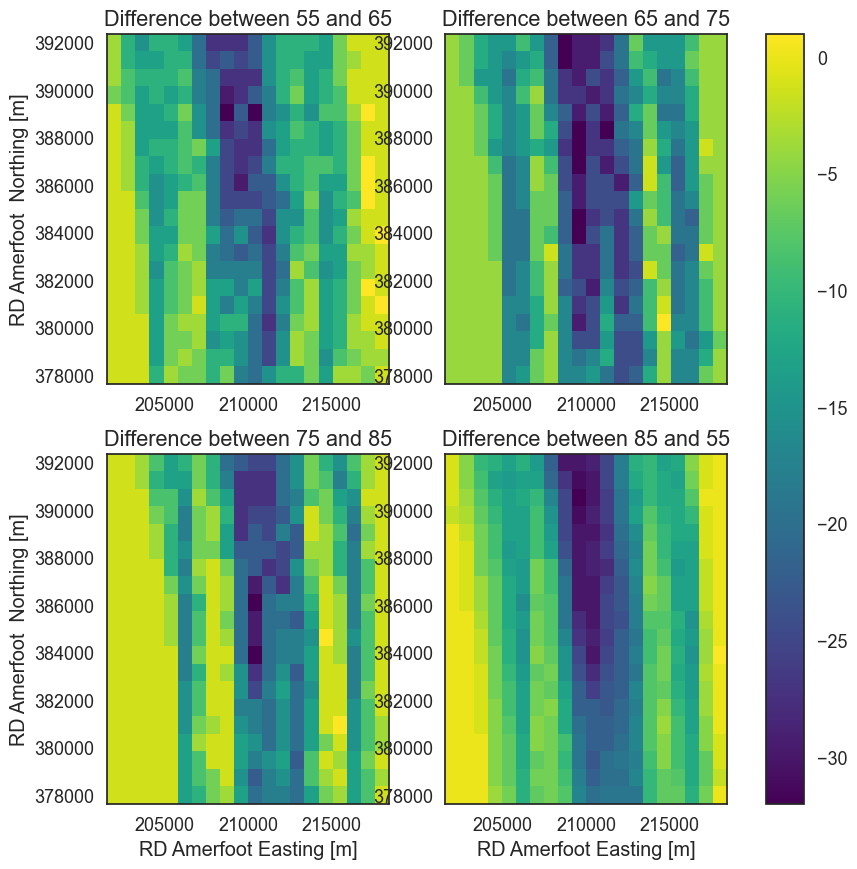

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# top left
im = axs[0, 0].pcolormesh(X, Y, re_arr_diff65_55, cmap="viridis", 
               vmin=diff65_55.min(), vmax=diff65_55.max())
axs[0, 0].set_ylabel("RD Amerfoot  Northing [m]")
axs[0, 0].set_title("Difference between 55 and 65")

# top right
im = axs[0, 1].pcolormesh(X, Y, re_arr_diff75_65, cmap="viridis", 
               vmin=diff75_65.min(), vmax=diff75_65.max())
axs[0, 1].set_title("Difference between 65 and 75")

# bottom left
im = axs[1, 0].pcolormesh(X, Y, re_arr_diff85_75, cmap="viridis", 
               vmin=diff85_75.min(), vmax=diff85_75.max())
axs[1, 0].set_xlabel("RD Amerfoot Easting [m]")
axs[1, 0].set_ylabel("RD Amerfoot  Northing [m]")
axs[1, 0].set_title("Difference between 75 and 85")

# bottom right
im = axs[1, 1].pcolormesh(X, Y, re_arr_diff85_55, cmap="viridis", 
               vmin=diff85_55.min(), vmax=diff85_55.max())
axs[1, 1].set_xlabel("RD Amerfoot Easting [m]")
axs[1, 1].set_title("Difference between 85 and 55")

# add a colorbar for all subplots
fig.colorbar(im, ax=axs.ravel().tolist())

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

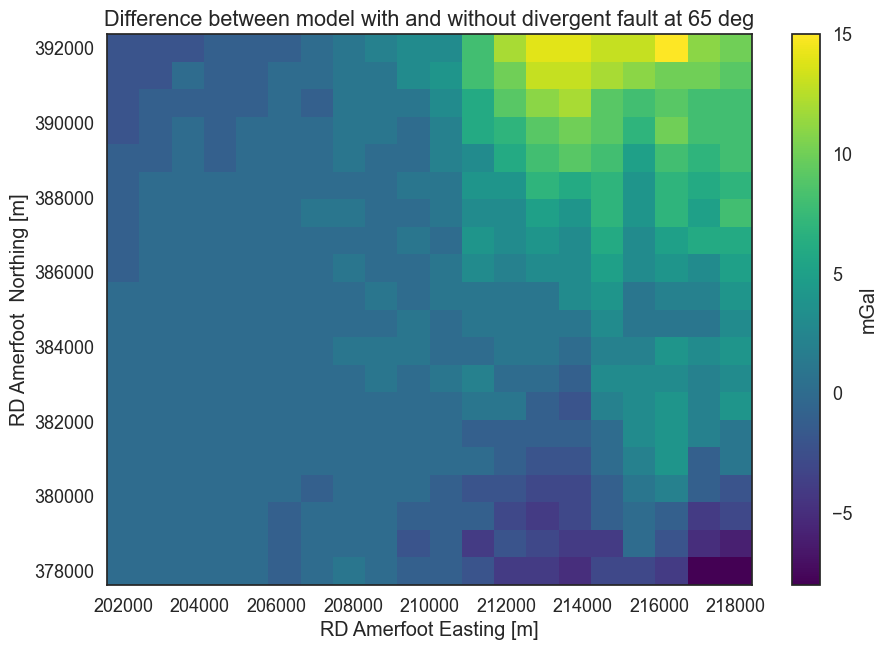

In [15]:
# General influence of lack of divergence
plt.pcolormesh(X, Y, re_arr_diffdiv, cmap="viridis", 
               vmin=diffdiv.min(), vmax=diffdiv.max())
plt.colorbar(label="mGal")
plt.xlabel("RD Amerfoot Easting [m]")
plt.ylabel("RD Amerfoot  Northing [m]")
plt.title("Difference between model with and without divergent fault at 65 deg")
plt.show